# 01. Введение


Содержание:
- Машинное обучение
    - Что такое машинное обучение?
    - Что такое искусственный интеллект?
    - Задачи и методы машинного обучения
    - Применение
- Теория вероятностей
    - случайные события
    - подсчёт комбинаций
    - вероятность события
    - формула полной вероятности
    - дискретные случайные величины
    - непрерывные случайные величины
    - описательная статистика (среднее, медиана, дисперсия, ковариация)
- Линейная алгебра
    - векторное пространство
    - метрика
    - матрицы
    - определитель
- Ссылки

TODO
- рекомендательные системы
- векторы признаков
- недобучение, переобучение
- добавить картинки

## Машинное обучение

### Что такое машинное обучени?

Пусть 
- $X$ множество объектов;
- $Y$ множество ответов.

Мы хотим уметь для каждого объекта определять ответ.

#### Пример

Предположим, что у нас есть робот 🤖, которого мы хотим научить сортировать яблоки не спелые и на не спелые. В таком случае имеем: 
- $X$ множество яблок;
- $Y$ множество ответов, является ли яблоко спелым или нет: {'`спелый`', '`не спелый`'}.

Как можно решать такую задачу?

**Способ 1.**

Можно написать алгоритм для робота 🤖: `если` яблоко `имеет свойства` <...>, `то` оно спелое, `иначе` не спелое.

Алгоритм реализован _явным_ образом:
- Для входных данных можно выяснить, почему алгоритм сработал именно так. И можно изменить поведение алгоритма, если это нужно.

Предположим, что $X$ теперь не множество яблок, а множество разных фруктов. Теперь доработать алгоритм будет сложнее. Возможно, его придётся переписывать полностью заново.

**Способ 2.**

Другой подход --- _машинное обучение_. Мы не реализуем алгоритм явно, а _обучаем_ робота 🤖, демонстрируя объекты и правильные ответы:
- 🍎 --- спелое яблоко,
- 🍏 --- не спелое яблоко.

Если потребуется задачу решить и для других фруктов, то добавим новые примеры:
- 🍐 --- спелый фрукт,
- 🍊 --- спелый фрукт.

Те объекты, которые мы демонстрируем, называются _обучающей выборкой_ --- мы их выбрали для _обучения_ нашего робота. Могли выбрать другие примеры.

Звучит хорошо, но возникает вопросы. Например,
- За счёт чего будет происходить обучение?
- Сколько фруктов надо показать? Когда обучение завершится? И может ли робот 🤖 ошибаться?

#### Пример

Для того, что бы продемонстрировать, что такое _обучение_, и как оно происходит, давайте разберём следующий пример.

Предположим, что мы хотим предсказывать какую оценку получит ученик за контрольную работу, на основе того, сколько времени он к ней готовился. При этому у нас есть такие данные:

|      | часы подготовки | оценка за контрольную |
|------|-----------------|-----------------------|
| Саша | 1               | 2                     |
| Петя | 2               | 4                     |
| Дима | 3               | 5                     |
| Вася | 4               | 4                     |
| Рита | 5               | 5                     |


Нарисуем данные на плоскости. По вертикали --- оценка, по горизонтали --- часы подготовки. (Для визуализации используем Python, но это пока не важно.)

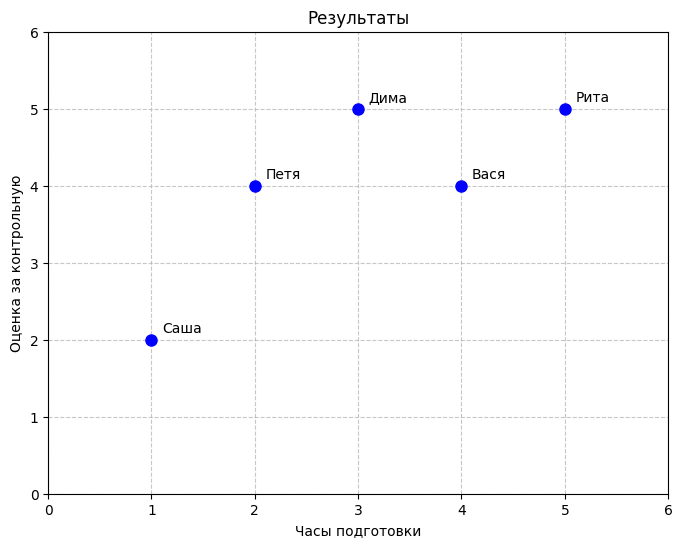

In [1]:
import matplotlib.pyplot as plt

# Данные
hours = [1, 2, 3, 4, 5]
grades = [2, 4, 5, 4, 5]
students = ['Саша', 'Петя', 'Дима', 'Вася', 'Рита']

# Построение графика
plt.figure(figsize=(8, 6))
plt.plot(hours, grades, 'bo', markersize=8)

# Подписи осей и заголовок
plt.xlabel('Часы подготовки')
plt.ylabel('Оценка за контрольную')
plt.title('Результаты')

# Добавление имен рядом с точками
for i, student in enumerate(students):
    plt.text(hours[i] + 0.1, grades[i] + 0.1, student)

# Сетка и ограничения осей
plt.grid(True, linestyle='--', alpha=0.7)
plt.xlim(0, 6)
plt.ylim(0, 6)

plt.show()

Видим, что есть _закономерность_ --- точки расположены не на одной прямой, но всё-таки вдоль некоторой линии.
Попробуем провести прямую, которая не сможет пройти через все точки, но будет находиться _максимально близко_ от них.

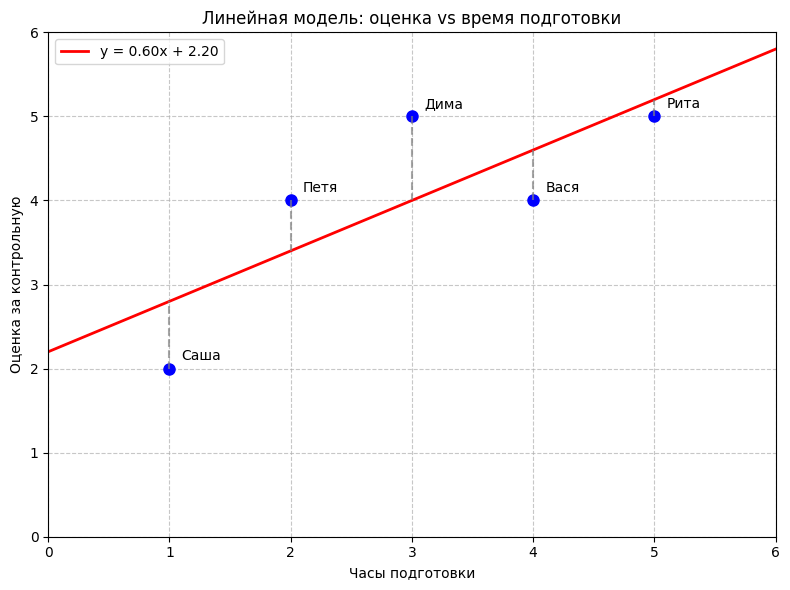

In [2]:
import numpy as np
from sklearn.linear_model import LinearRegression


# Линейная регрессия
model = LinearRegression()
model.fit(np.array(hours).reshape(-1, 1), np.array(grades))

# Генерируем точки для гладкой линии
hours_smooth = np.linspace(0, 6, 100).reshape(-1, 1)
grades_smooth = model.predict(hours_smooth)

# Создание графика
plt.figure(figsize=(8, 6))

# Рисуем гладкую линию регрессии
plt.plot(hours_smooth, grades_smooth, 'r-', linewidth=2, 
         label=f'y = {model.coef_[0]:.2f}x + {model.intercept_:.2f}')

# Рисуем исходные точки
plt.plot(hours, grades, 'bo', markersize=8)

# Добавляем вертикальные линии от точек до линии регрессии (ошибки)
hours_array = np.array(hours).reshape(-1, 1)
for i in range(len(hours)):
    pred_grade = model.predict(hours_array[i].reshape(-1, 1))[0]
    plt.plot([hours_array[i][0], hours_array[i][0]], [grades[i], pred_grade], 
             'gray', linestyle='--', alpha=0.7)

# Подписи осей и заголовок
plt.xlabel('Часы подготовки')
plt.ylabel('Оценка за контрольную')
plt.title('Линейная модель: оценка vs время подготовки')

# Добавление имен рядом с точками
for i, student in enumerate(students):
    plt.text(hours[i] + 0.1, grades[i] + 0.1, student)

# Сетка и ограничения осей
plt.grid(True, linestyle='--', alpha=0.7)
plt.xlim(0, 6)
plt.ylim(0, 6)
plt.legend()

plt.tight_layout()
plt.show()

В итоге мы получили линейную модель (красная прямая $y = 0.6x + 2.2$). Это модель есть математическая форма закономерности, которую мы заметили выше (точки вдоль линии). Модель позволяет прогнозировать оценку, в зависимости от часов подготовки.

> Например, если потратить на обучение $4.5$ часа, то оценка будет $y(x=4.5) = 0.6*4.5+2.2 = 4.9$.

Модель делает прогноз с погрешностью. Погрешность на наших данных не более одного балла.

Резюмируем.

**Машинное обучение** --- это подход решения задач, который использует алгоритмы, позволяющие компьютерам обучаться выполнять задачи, не будучи явно запрограммированными для каждой из них. В основе лежит идея о том, что системы могут извлекать закономерности из данных, принимать решения и улучшать свою производительность с опытом.

### Что такое искусственный интеллект?


**Искусственный интеллект (Artificial Intelligence, AI)** --- это область компьютерной науки, посвященная созданию систем и машин, способных выполнять задачи, которые обычно требуют человеческого интеллекта.

Машинное обучение --- это подраздел искусственного интеллекта.

Основные вехи:

- 1943: **Модель искусственного нейрона** (У. МакКаллок и У. Питтс) --- первая математическая модель нейрона, заложившая основу для нейросетей.
- 1950: **Тест Тьюринга** (Алан Тьюринг) --- предложен критерий для оценки интеллекта машины.
- 1980-е: **Экспертные системы** — коммерческий бум систем, которые воспроизводили знания и логику специалистов в узких областях.
- 1997: **Deep Blue побеждает Каспарова** --- компьютер впервые обыграл чемпиона мира по шахматам.
- 2012: **AlexNet и начало бума глубокого обучения** --- победа сверточной нейросети в конкурсе ImageNet резко повысила точность распознавания образов.
- 2016: **AlphaGo побеждает в Го** (DeepMind) --- программа победила чемпиона мира в игре го.
- 2017: **Трансформеры** (архитектура Transformer) --- предложена архитектура нейросетей для обработки последовательностей, лежащая в основе современных больших языковых моделей.
- 2018: **GPT и BERT** --- появление мощных языковых моделей, кардинально улучшивших понимание и генерацию естественного языка.
- 2022–2023: **Широкое распространение генеративного ИИ** --- запуск ChatGPT, Midjourney и других моделей, сделавших генеративный ИИ доступным для массового пользователя.

### Задачи и методы машинного обучения

#### Обучение с учителем (Supervised Learning)

Хотим предсказывать целевую переменную (ответ) на основе входных данных (признаков).
Используется размеченный набор данных, где выходных данных указаны правильные ответы.

**Классификация** (предсказание категории/класса):
- Логистическая регрессия
- Метод опорных векторов (SVM)
- Деревья решений, случайный лес (Random Forest)
- Градиентный бустинг (Gradient Boosting) --- пооследовательное построение моделей (часто деревьев), где каждая следующая исправляет ошибки предыдущих (XGBoost, LightGBM, CatBoost)
- k-ближайших соседей (kNN)
- Нейронные сети (Neural Nets)

**Регрессия** (предсказание непрерывного числового значения:
- Линейная регрессия
- Деревья решений и ансамбли (случайный лес, градиентный бустинг)

#### Обучение без учителя (Unsupervised Learning)

Нет размеченнных данных, хотим найти скрытые структуры или закономерности

**Кластеризация** (разделение данных на группы или, кластеры, схожих объектов):
- K-средних (K-Means)
- Иерархическая кластеризаци ---древовидная структура кластеров

**Снижение размерности** (уменьшение количества признаков, чтобы упростить данные, сохранив важную информацию):
- Метод главных компонент (PCA)
- t-SNE, UMAP

#### Обучение с подкреплением (Reinforcement Learning)

Хотим научить агента действовать в окружающей среде, чтобы максимизировать награду. Агент учится методом проб и ошибок.

#### Глубокое обучение (Deep Learning)

Используются (глубокие) нейронные сети. Может применяться во всех вышеперечисленных категориях.

- Сверточные нейронные сети (CNN): задачи компьютерного зрения
- Рекуррентные нейронные сети (RNN) и LSTM/GRU: обработка последовательностей (распознавание речи, машинный перевод, анализ временных рядов)
- Трансформеры (Transformers): обработка естественного языка (NLP), лежит в основе моделей вроде GPT и BERT
- Автокодировщики (Autoencoders): нейросети для обучения без учителя, часто используемые для снижения размерности и шумоподавления
- Генеративные состязательные сети (GAN): генерация новых реалистичных данных (например, изображений)
- Диффузионные модели: генерация новых реалистичных данных (например, изображений)

### Применение

???

## Теория вероятностей

- случайные события
- подсчёт комбинаций
- вероятность события
- формула полной вероятности
- дискретные случайные величины
- непрерывные случайные величины
- описательная статистика (среднее, медиана, дисперсия, ковариация)

## Линейная алгебра

- векторное пространство
- метрика
- матрицы
- определитель

## Ссылки